In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib as mpl

from astropy.table import Table

label_size = 15

mpl.rcParams['legend.fontsize'] = label_size - 7
mpl.rcParams['axes.labelsize'] = label_size 

mpl.rcParams['xtick.labelsize'] = label_size - 5
mpl.rcParams['ytick.labelsize'] = label_size - 5

mpl.rcParams['axes.labelpad'] = 10

      PHOTON_TIME  PHOTON_ENERGY          RA        DEC
0        0.031144       0.192009  121.038292  89.705193
1        0.262551       0.288640  119.132744  89.700813
2        0.264927       0.203850   12.316710  89.895248
3        0.265698       0.303872   61.183815  89.832817
4        0.484277       0.417694  359.315491  89.900581
...           ...            ...         ...        ...
6019  1999.648721       1.045898   87.993370  89.984001
6020  1999.698102       0.155491  125.665314  89.993591
6021  1999.763978       1.377149  304.633789  89.998230
6022  1999.825891       0.458787  163.142365  89.991295
6023  1999.853344       0.211834   56.962158  89.987930

[6024 rows x 4 columns]

Min photon energy 0.09961611032485962
Max photon energy 31.026336669921875
Total photon energy 5810.289


<ipython-input-6-f4fa408ab3fe>:19: RuntimeWarning: divide by zero encountered in log10
  cbar = plt.imshow(np.log10(hist))


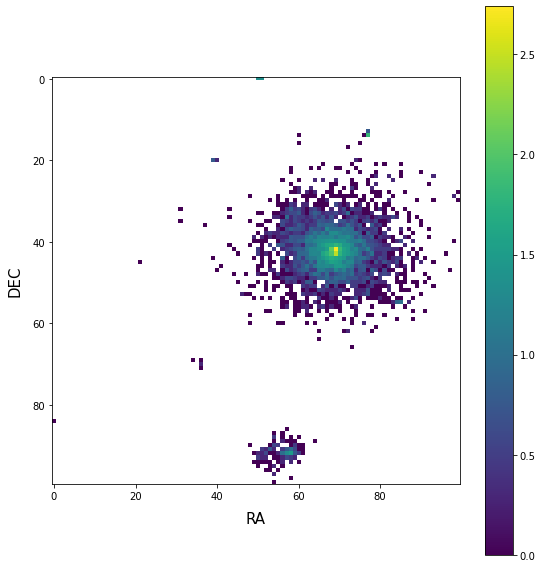

In [6]:
fname = "8zi62d6va3dtil0t/phlist_xissim.fits"
mode = 'wrapped'
#fname = "../8zi62d6va3dtil0t/phlist.fits"

dat = Table.read(fname, format='fits')
df = dat.to_pandas()
print(df)
print("")
print("Min photon energy", min(df.PHOTON_ENERGY))
print("Max photon energy", max(df.PHOTON_ENERGY))
print("Total photon energy", np.sum(df.PHOTON_ENERGY))
if mode=='wrapped':
    phi = df.RA * (np.pi/180)
    rho = np.abs(df.DEC-90) * (np.pi/180)
    x,y = rho * np.cos(phi), rho * np.sin(phi)
    
plt.figure(figsize=(8,8))
hist, xedges, yedges = np.histogram2d(x=x, y=y, bins=(100,100))
cbar = plt.imshow(np.log10(hist))
plt.colorbar(cbar)
plt.xlabel("RA"), plt.ylabel("DEC")
plt.tight_layout()
plt.savefig("cluster_1.png",dpi=200)
plt.show()
plt.close()

       PHOTON_TIME  PHOTON_ENERGY          RA        DEC
0         0.029205       0.149803  355.045990  89.384369
1         0.031144       0.154622  355.171570  89.383415
2         0.262551       0.154951  355.245880  89.385811
3         0.264927       0.161670  355.178345  89.385101
4         0.265698       0.161844  355.211517  89.383583
...            ...            ...         ...        ...
21520  1999.782422       0.326739  184.714905  89.383041
21521  1999.825891       0.752262  129.271194  89.153259
21522  1999.853344       1.067479   38.942760  89.133324
21523  1999.936917       0.159425  184.505722  89.384903
21524  1999.960189       1.057264  184.687668  89.383713

[21525 rows x 4 columns]

Min photon energy 0.08696947991847992
Max photon energy 33.203189849853516
Total photon energy 20362.922


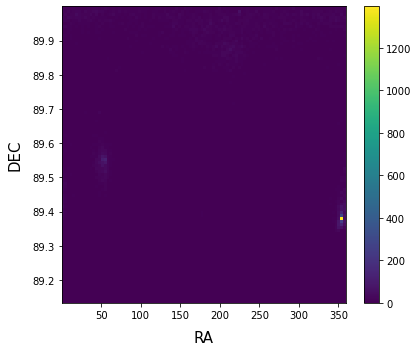

In [35]:
fname = "8xzrs1xhz57mkchg/phlist_xissim.fits"
#fname = "../8zi62d6va3dtil0t/phlist.fits"

dat = Table.read(fname, format='fits')
df = dat.to_pandas()
print(df)
print("")
print(min(df.PHOTON_ENERGY))
print(max(df.PHOTON_ENERGY))


plt.figure(figsize=(6,5))
plt.hist2d(x=df.RA, 
           y=df.DEC,
           weights=df.PHOTON_ENERGY,
           cmap = plt.cm.viridis,
           bins=100)
plt.colorbar(label="")
plt.xlabel("RA"), plt.ylabel("DEC")
plt.tight_layout()
plt.savefig("cluster_1.png",dpi=200)
plt.show()
plt.close()

Questions:
- how to properly do 2D histogram with 3D data
- why is there such a wide range of RAs and DECs if this is for a single cluster?
- how to pick or know the right bin size to represent the actual pixel size of the image
    - look at eRosita docs, number of pixels in field of view (FOV) and size of each pixel
    - ADS literature search with eRosita and sort by high citations
    - check if FOV bounded by RA/DEC in PHOX same as FOV for eRosita
    - if FOV agrees, we can plot pixel size properly
    
Klaus PI. of magneticum

In [1]:
fname = "t35x0t54nb8fbpw3/phlist_xissim.fits"
#fname = "../8zi62d6va3dtil0t/phlist.fits"

dat = Table.read(fname, format='fits')
df = dat.to_pandas()
print(df)
print("")
print("Min photon energy", min(df.PHOTON_ENERGY))
print("Max photon energy", max(df.PHOTON_ENERGY))
print("Total photon energy", np.sum(df.PHOTON_ENERGY))


plt.figure(figsize=(5,5))
plt.hist2d(x=df.RA, 
           y=df.DEC,
           weights=df.PHOTON_ENERGY,
           cmap = plt.cm.viridis,
           bins=1100)
plt.colorbar(label="")
plt.xlabel("RA"), plt.ylabel("DEC")
plt.tight_layout()
plt.savefig("cluster_1.png",dpi=200)
plt.show()
plt.close()


NameError: name 'Table' is not defined

To do:
- things at 90 are at center=> put at 0, 0
- ra will go from 0 to 360
- recast to x-y units from a sphere surface or use astropy frame
- plot in log in photon counts